#Regressão Logística

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Leitura dos dados de diabetes

In [2]:
df = pd.read_csv('diabetes.csv')

*DiabetesPedigreeFunction* - pontuação da probabilidade diabetes de acordo com o histórico familiar

*Outcome* - variável que pretende se prever, que reperesenta se teve biabetes com o valor 1 e se não teve 0

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Informações estatísticas dos dados

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Gerando gráfico de dispersão

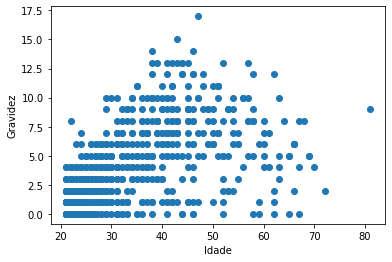

In [16]:
plt.plot(df['Age'], df['Pregnancies'], 'o')
plt.xlabel('Idade')
plt.ylabel('Gravidez')
plt.show()

Separação da variável dependente (que deseja prever)

In [6]:
y = df['Outcome']

In [7]:
x = df.drop('Outcome', axis=1) #removendo a coluna outcome da base de dados
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


Separar os dados de treino e teste

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2) #80% dos dados serão usados para treinar o algoritmo

Selecionar modelo de regressão logística

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
modelo = LogisticRegression(max_iter=5000) #número máximo de 5000 iterações

Treinando o modelo

In [12]:
modelo.fit(x_treino, y_treino)

LogisticRegression(max_iter=5000)

Realizando as previsões

In [13]:
y_previsto = modelo.predict(x_teste)
print(y_previsto[:10])

[0 0 1 0 1 1 1 0 0 0]


Validando o modelo

In [14]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_teste, y_previsto)
print(accuracy*100.)

78.57142857142857
